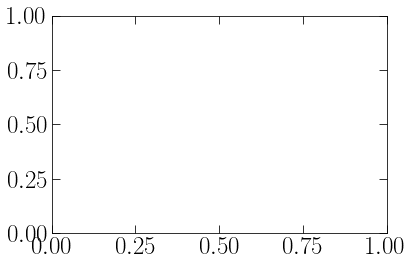

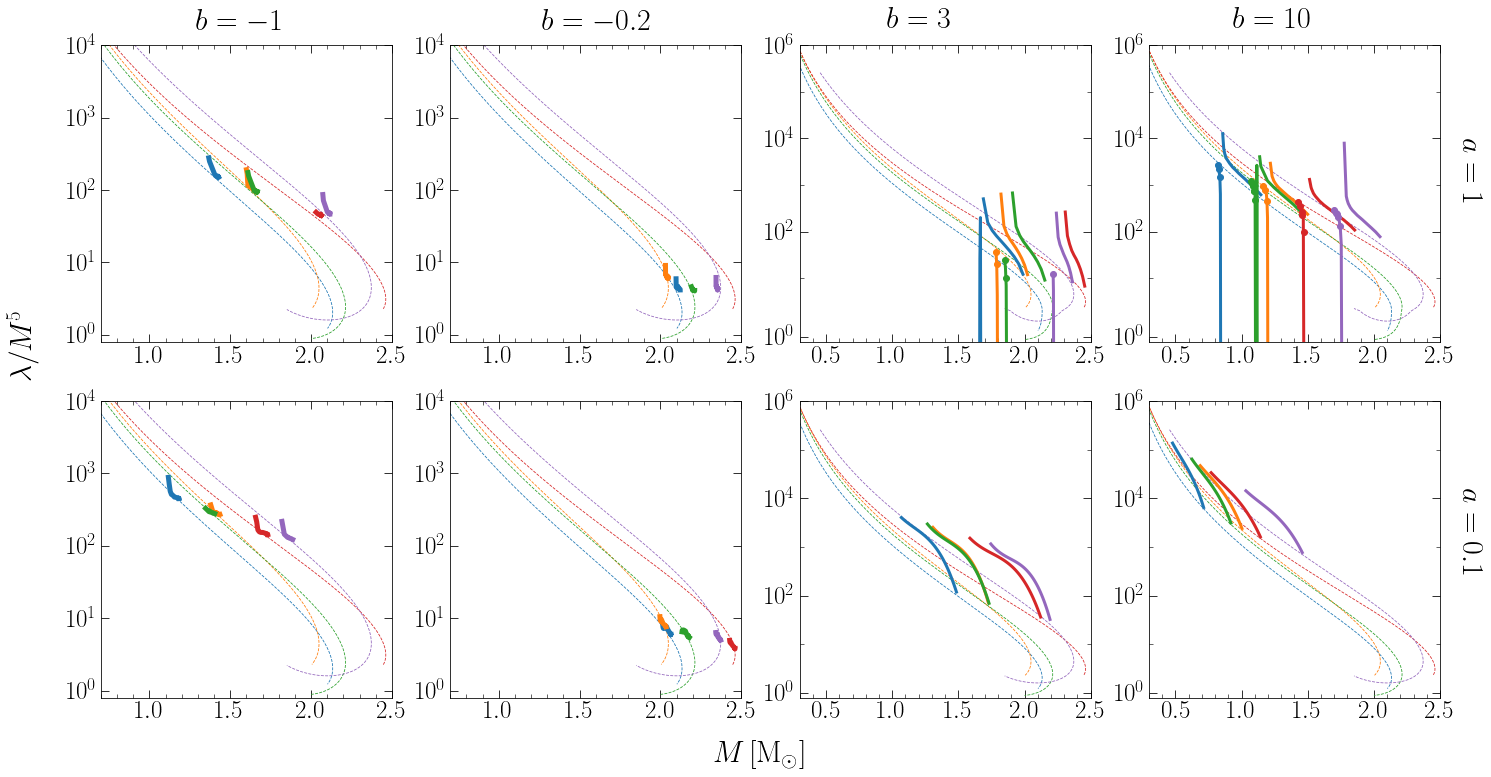

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
import matplotlib.ticker as mticker 

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import sys
import warnings
import timeit
import scipy.optimize
from matplotlib import cm
from scipy.integrate import ode as sp_ode

t0 = timeit.time.time()
from shapely.geometry import LineString
from scipy.interpolate import UnivariateSpline
G=const.G.cgs.value
c=const.c.cgs.value
MSUN=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
KM=10**5
import math

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5

fig, axs = plt.subplots(2, 4,figsize=(24,12))
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])

axs[0,0].set_ylim(0.8,1e4)
axs[0,1].set_ylim(0.8,1e4)
axs[0,2].set_ylim(0.8,1e6)
axs[0,3].set_ylim(0.8,1e6)
axs[1,0].set_ylim(0.8,1e4)
axs[1,1].set_ylim(0.8,1e4)
axs[1,2].set_ylim(0.8,1e6)
axs[1,3].set_ylim(0.8,1e6)
axs[0,0].set_xlim(0.7, 2.5)
axs[0,1].set_xlim(0.7, 2.5)
axs[0,2].set_xlim(0.3, 2.5)
axs[0,3].set_xlim(0.3, 2.5)
axs[1,0].set_xlim(0.7, 2.5)
axs[1,1].set_xlim(0.7, 2.5)
axs[1,2].set_xlim(0.3, 2.5)
axs[1,3].set_xlim(0.3, 2.5)

for i in range(2):
    for j in range(4):
        for k in range(5):
            grdata1=np.genfromtxt('TOV_tidal_v1_data'+str(k+1)+'.txt')
            a10, a11, a12, a13, a14 = grdata1[:, 0], grdata1[:, 1], grdata1[:, 2], grdata1[:, 3], grdata1[:, 4]
            axs[i,j].plot(a11/Ms,a13,color=colorset[k],linestyle='--',linewidth=0.8)
#             axs[i,j].set_ylim(0.9,10000)
            axs[i,j].set_yscale('symlog')
            axs[i,j].minorticks_off()            
            axs[i,j].xaxis.set_minor_locator(MultipleLocator(0.1))

ntrim1set=[13, 16, 14, 15, 13]
ntrim2set=[22, 20, 16, 20]
ntrim3set=[17, 17, 18, 16, 14]
ntrim4set=[18, 14, 9, 16, 13]
ntrim5set=[18, 13, 12, 17, 13]
ntrim6set=[19, 21, 21, 24, 23]


# the first plot
offset = [15, 15, 10, 5, 5]
for i in range(5):
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data2'+str(i+1)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321[0:ntrim1set[i]]/MSUN 
    y21 = c921[0:ntrim1set[i]] - offset[i]*np.ones_like(c921[0:ntrim1set[i]])
    #axs[0,0].semilogy(x21, y21, 'o', color = colorset[i])
    axs[0,0].semilogy(x21, y21, color = colorset[i], linewidth =5)     
axs[0,0].set_yticks([1,10,100,1000,10000]) 
axs[0,0].minorticks_off()
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.1)) 
    
# the second plot
list2=[26,27,28,30]
for i in range(4):
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321[0:ntrim2set[i]]/MSUN 
    y21 = c921[0:ntrim2set[i]] 
    if list2[i]!=30:
        #axs[0,1].semilogy(x21, y21, 'o', color = colorset[i]) 
        axs[0,1].semilogy(x21, y21, color = colorset[i], linewidth =5)           
    else:
        #axs[0,1].semilogy(x21, y21, 'o', color = colorset[i+1])
        axs[0,1].semilogy(x21, y21, color = colorset[i+1], linewidth =5)        
axs[0,1].set_yticks([1,10,100,1000,10000])
axs[0,1].minorticks_off()
axs[0,1].xaxis.set_minor_locator(MultipleLocator(0.1))
    
n1=np.array([17, 17, 18, 16, 14])    
# the third plot
for i in range(5):
    warnings.filterwarnings("ignore", category=UserWarning)
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data3'+str(i+1)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321/MSUN 
    y21 = c921 
    
    x1=x21[0:n1[i]]
    y1=y21[0:n1[i]]
    index=x1.argsort()
    ydata=y1[index]
    xdata=x1[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,2].plot(xs, ys, color = colorset[i],linewidth=3) 
    
    x2=x21[n1[i]:len(x21)]
    y2=y21[n1[i]:len(x21)]
    index=x2.argsort()
    ydata=y2[index]
    xdata=x2[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,2].plot(x2, y2, 'o', color = colorset[i])     
    axs[0,2].plot(xs, ys, color = colorset[i],linewidth=3) 
    axs[0,2].set_yscale('symlog')
axs[0,2].set_yticks([1, 1e2, 1e4, 1e6])
y_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[0,2].yaxis.set_minor_locator(y_minor)
axs[0,2].yaxis.set_minor_formatter(mticker.NullFormatter())


n2=np.array([18, 14, 9, 16, 13]) 
# the fourth plot
for i in range(5):
    warnings.filterwarnings("ignore", category=UserWarning)
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+36)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321/MSUN
    y21 = c921
    x1=x21[0:n2[i]]
    y1=y21[0:n2[i]]
    #print(y1)
#     index=x1.argsort()
#     ydata=y1[index]
#     xdata=x1[index]
#     s1 = UnivariateSpline(xdata, ydata, s=5)
#     xs=np.linspace(min(xdata),max(xdata),10)
#     ys=s1(xs)
    axs[0,3].plot(x1, y1, color = colorset[i],linewidth=3) 
    
    x2=x21[n2[i]:len(x21)]
    y2=y21[n2[i]:len(x21)]
    #print(y2)
    index=x2.argsort()
    ydata=y2[index]
    xdata=x2[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,3].plot(x2, y2, 'o', color = colorset[i])
    axs[0,3].plot(xs, ys, color = colorset[i],linewidth=3) 
    axs[0,3].set_yscale('symlog')
axs[0,3].set_yticks([1, 1e2, 1e4, 1e6])
y_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[0,3].yaxis.set_minor_locator(y_minor)
axs[0,3].yaxis.set_minor_formatter(mticker.NullFormatter())

# the fifth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+1)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31[0:ntrim5set[i]]/MSUN 
    y1 = c71[0:ntrim5set[i]] 
    #axs[1,0].semilogy(x1, y1, 'o', color = colorset[i]) 
    axs[1,0].semilogy(x1, y1, color = colorset[i], linewidth=5)    
axs[1,0].set_yticks([1,10,100,1000,10000])
axs[1,0].minorticks_off()
axs[1,0].xaxis.set_minor_locator(MultipleLocator(0.1))
    
# the sixth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+6)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31[0:ntrim6set[i]]/MSUN 
    y1 = c71[0:ntrim6set[i]] 
    #axs[1,1].semilogy(x1, y1, 'o', color = colorset[i])
    axs[1,1].semilogy(x1, y1, color = colorset[i], linewidth=5) 
axs[1,1].set_yticks([1,10,100,1000,10000])
axs[1,1].minorticks_off()
axs[1,1].xaxis.set_minor_locator(MultipleLocator(0.1)) 

# the seventh plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+11)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31/MSUN 
    y1 = c71 
    a=x1[0:12]
    b=x1[14:-1]
    c=np.hstack([a,b])
    d=y1[0:12]
    e=y1[14:-1]
    f=np.hstack([d,e])
    
    index=c.argsort()
    ydata=np.log10(f[index])
    xdata=c[index]
    s1 = UnivariateSpline(xdata, ydata, s=10)
    xs=np.linspace(min(xdata),max(xdata),50)
    ys=10**s1(xs)
    axs[1,2].semilogy(xs, ys, color = colorset[i],linewidth=3) 
    
axs[1,2].set_yticks([1, 1e2, 1e4, 1e6])
y_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[1,2].yaxis.set_minor_locator(y_minor)
axs[1,2].yaxis.set_minor_formatter(mticker.NullFormatter())

    
# the eigth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+16)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31/MSUN 
    y1 = c71 

    a=x1[0:12]
    b=x1[14:-1]
    c=np.hstack([a,b])
    d=y1[0:12]
    e=y1[14:-1]
    f=np.hstack([d,e])
    
    index=c.argsort()
    ydata=np.log10(f[index])
    xdata=c[index]
    s1 = UnivariateSpline(xdata, ydata, s=10)
    xs=np.linspace(min(xdata),max(xdata),50)
    ys=10**s1(xs)
    axs[1,3].semilogy(xs, ys, color = colorset[i],linewidth=3) 
axs[1,3].set_yticks([1, 1e2, 1e4, 1e6])
y_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[1,3].yaxis.set_minor_locator(y_minor)
axs[1,3].yaxis.set_minor_formatter(mticker.NullFormatter())

    
fig.text(0.08, 0.5,r'$\lambda/M^5$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$M\,[{ \rm M_{\odot}}]$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='-90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='-90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("fig_nonlin_Mtidal.pdf", format='pdf', bbox_inches="tight")

plt.show()

